In [8]:
pip install "cdsapi>=0.7.4"

In [3]:
import cdsapi

# Initialize the CDS API client
c = cdsapi.Client()

print("CDS API is configured correctly!")


2025-02-13 19:59:58,026 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-13 19:59:58,026 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


CDS API is configured correctly!


In [1]:
import xarray as xr

# Load the NetCDF file
file_path = r"C:\Users\Dipanjan\Downloads\9f7930fcce5b5cb00ed41daa2d7a2dfb (1)\data_version-4.0_consolidated.nc"
ds = xr.open_dataset(file_path)

# Print metadata
print(ds)

# List available variables
print(ds.variables)


<xarray.Dataset> Size: 3kB
Dimensions:     (valid_time: 48, latitude: 3, longitude: 5)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 384B 2018-01-02 ... 2018-12-25
    rootZone    float64 8B ...
  * latitude    (latitude) float64 24B 10.78 10.72 10.68
  * longitude   (longitude) float64 40B 76.47 76.52 76.57 76.62 76.67
Data variables:
    swir        (valid_time, latitude, longitude) float32 3kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-08T14:39 GRIB to CDM+CF via cfgrib-0.9.1...
Frozen({'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 48)> Size: 384B
array(['2018-01-02T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '

Frozen({'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 48)> Size: 384B
array(['2018-01-02T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-02-02T00:00:00.000000000', '2018-02-09T00:00:00.000000000',
       '2018-02-17T00:00:00.000000000', '2018-02-25T00:00:00.000000000',
       '2018-03-02T00:00:00.000000000', '2018-03-09T00:00:00.000000000',
       '2018-03-17T00:00:00.000000000', '2018-03-25T00:00:00.000000000',
       '2018-04-02T00:00:00.000000000', '2018-04-09T00:00:00.000000000',
       '2018-04-17T00:00:00.000000000', '2018-04-25T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-05-09T00:00:00.000000000',
       '2018-05-17T00:00:00.000000000', '2018-05-25T00:00:00.000000000',
       '2018-06-02T00:00:00.000000000', '2018-06-09T00:00:00.000000000',
       '2018-06-17T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-07-02T00:00:00.000000000'

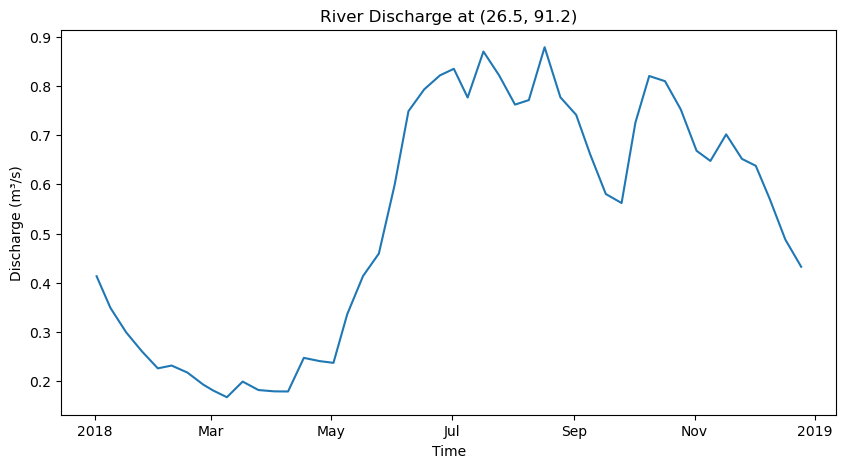

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Dipanjan\Downloads\9f7930fcce5b5cb00ed41daa2d7a2dfb (1)\data_version-4.0_consolidated.nc"
ds = xr.open_dataset(file_path)

# Check dataset variables
print(ds.variables)  # This will confirm the actual variable names

# Select the correct discharge variable
river_discharge = ds['swir']  # Using 'dis24' instead of 'river_discharge'

# Select a specific point (modify lat/lon as needed)
lat, lon = 26.5, 91.2  # Example coordinates for Brahmaputra
time_series = river_discharge.sel(latitude=lat, longitude=lon, method="nearest")

# Plot
plt.figure(figsize=(10, 5))
time_series.plot()
plt.title(f"River Discharge at ({lat}, {lon})")
plt.ylabel("Discharge (m³/s)")
plt.xlabel("Time")
plt.show()



In [4]:
import pandas as pd

# Convert dataset to Pandas DataFrame
df = ds.to_dataframe().reset_index()

# Save to CSV
csv_path = r"C:\Users\Dipanjan\Downloads\9f7930fcce5b5cb00ed41daa2d7a2dfb (1)\swir.csv"
df.to_csv(csv_path, index=False)

print(f"CSV file saved at: {csv_path}")


CSV file saved at: C:\Users\Dipanjan\Downloads\9f7930fcce5b5cb00ed41daa2d7a2dfb (1)\swir.csv


Maximum Discharge at Goalpara: 80254.92 m³/s
Maximum Discharge at Guwahati: 65381.09 m³/s
Maximum Discharge at Tezpur: 54663.44 m³/s
Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\goalpara_discharge_2024.png


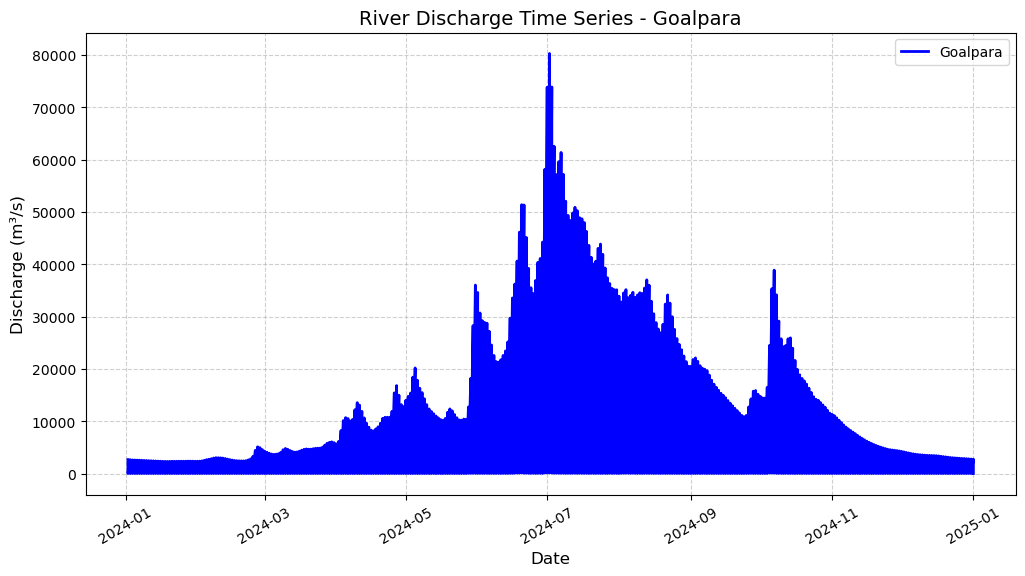

Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\guwahati_discharge_2024.png


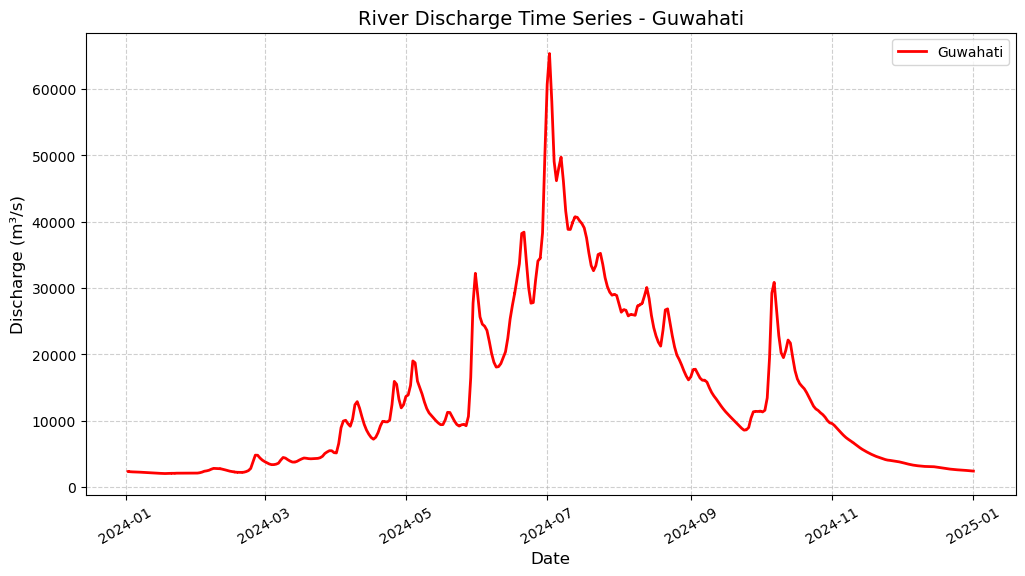

Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\tezpur_discharge_2024.png


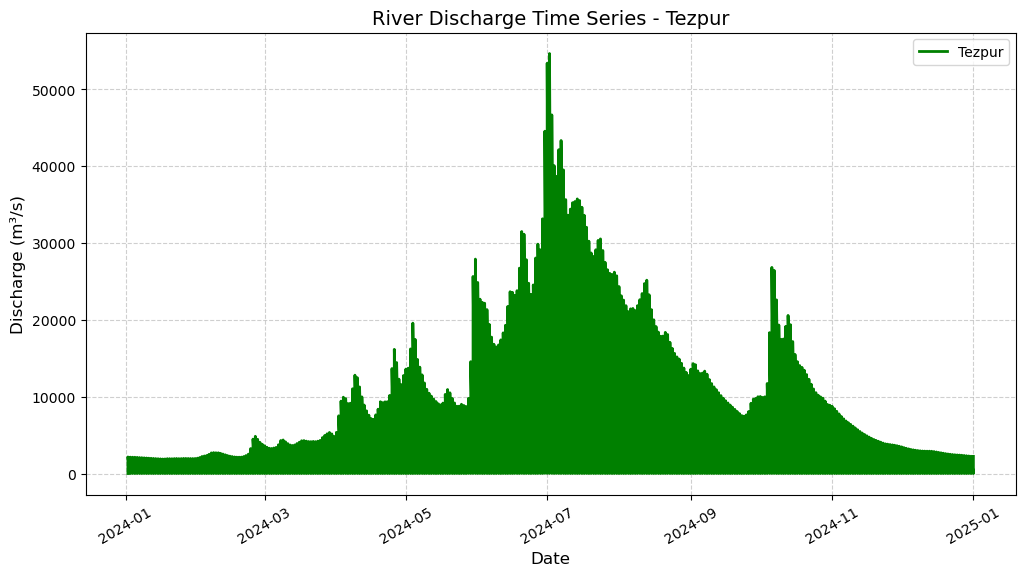

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
goalpara_file = r"H:\Major_Project\Work\Discharge Data\Goalpara\discharge_data_2024.csv"
guwahati_file = r"H:\Major_Project\Work\Discharge Data\Guwahati\discharge_data_2024.csv"
tezpur_file = r"H:\Major_Project\Work\Discharge Data\Tezpur\discharge_data_2024.csv"

df_goalpara = pd.read_csv(goalpara_file)
df_guwahati = pd.read_csv(guwahati_file)
df_tezpur = pd.read_csv(tezpur_file)

# Strip any spaces from column names
df_goalpara.columns = df_goalpara.columns.str.strip()
df_guwahati.columns = df_guwahati.columns.str.strip()
df_tezpur.columns = df_tezpur.columns.str.strip()

# Convert 'valid_time' to datetime
df_goalpara["valid_time"] = pd.to_datetime(df_goalpara["valid_time"])
df_guwahati["valid_time"] = pd.to_datetime(df_guwahati["valid_time"])
df_tezpur["valid_time"] = pd.to_datetime(df_tezpur["valid_time"])

# Rename discharge columns for clarity
df_goalpara = df_goalpara.rename(columns={"dis24": "discharge_goalpara"})
df_guwahati = df_guwahati.rename(columns={"dis24": "discharge_guwahati"})
df_tezpur = df_tezpur.rename(columns={"dis24": "discharge_tezpur"})

# Print maximum discharge values
max_goalpara = df_goalpara["discharge_goalpara"].max()
max_guwahati = df_guwahati["discharge_guwahati"].max()
max_tezpur = df_tezpur["discharge_tezpur"].max()

print(f"Maximum Discharge at Goalpara: {max_goalpara:.2f} m³/s")
print(f"Maximum Discharge at Guwahati: {max_guwahati:.2f} m³/s")
print(f"Maximum Discharge at Tezpur: {max_tezpur:.2f} m³/s")

# Function to plot and save individual graphs
def plot_discharge(df, location, color):
    plt.figure(figsize=(12, 6))
    plt.plot(df["valid_time"], df[f"discharge_{location.lower()}"], label=location, color=color, linewidth=2)
    
    # Formatting
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Discharge (m³/s)", fontsize=12)
    plt.title(f"River Discharge Time Series - {location}", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=30)

    # Save the figure
    output_path = rf"H:\Major_Project\Work\Discharge Data\Graphs\{location.lower()}_discharge_2024.png"
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    print(f"Graph saved at: {output_path}")

    # Show the plot
    plt.show()

# Plot and save separate graphs
plot_discharge(df_goalpara, "Goalpara", "blue")
plot_discharge(df_guwahati, "Guwahati", "red")
plot_discharge(df_tezpur, "Tezpur", "green")







Maximum Discharge at Sahibganj: 51745.94 m³/s
Maximum Discharge at Farakka: 52961.40 m³/s
Maximum Discharge at Katwa: 4724.00 m³/s
Maximum Discharge at Kakdwip: 11438.25 m³/s
Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\sahibganj_discharge_2024.png


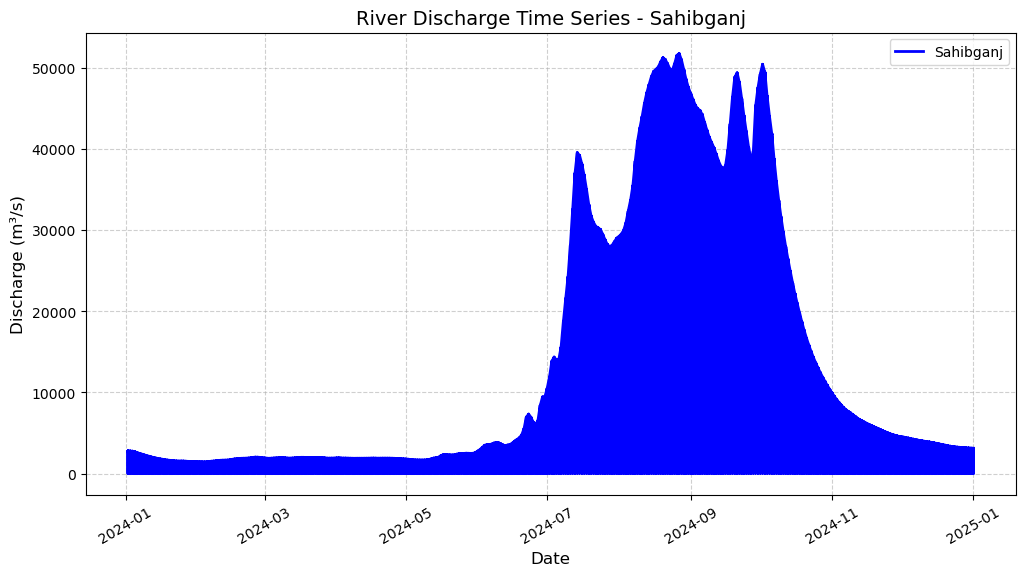

Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\farakka_discharge_2024.png


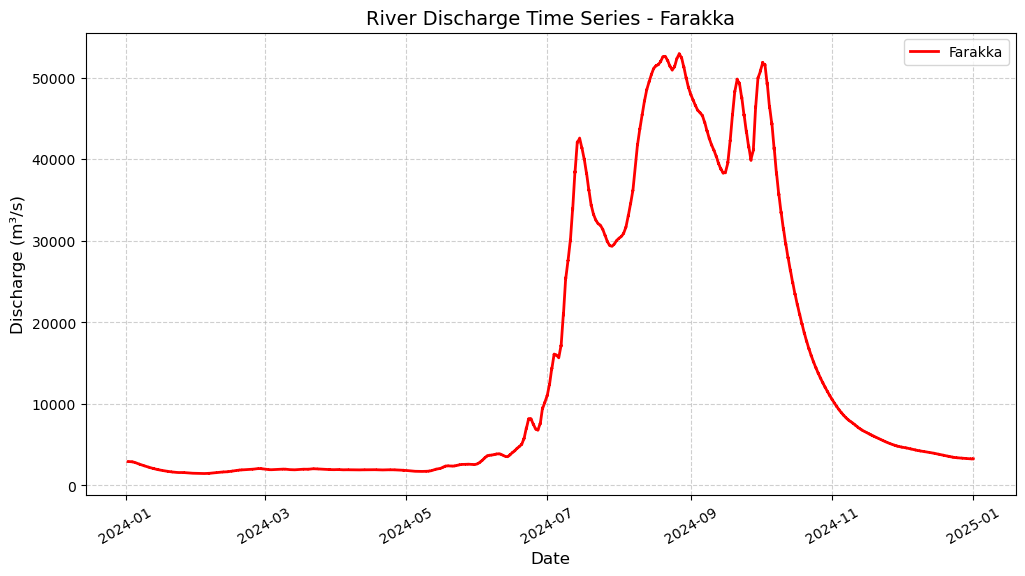

Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\katwa_discharge_2024.png


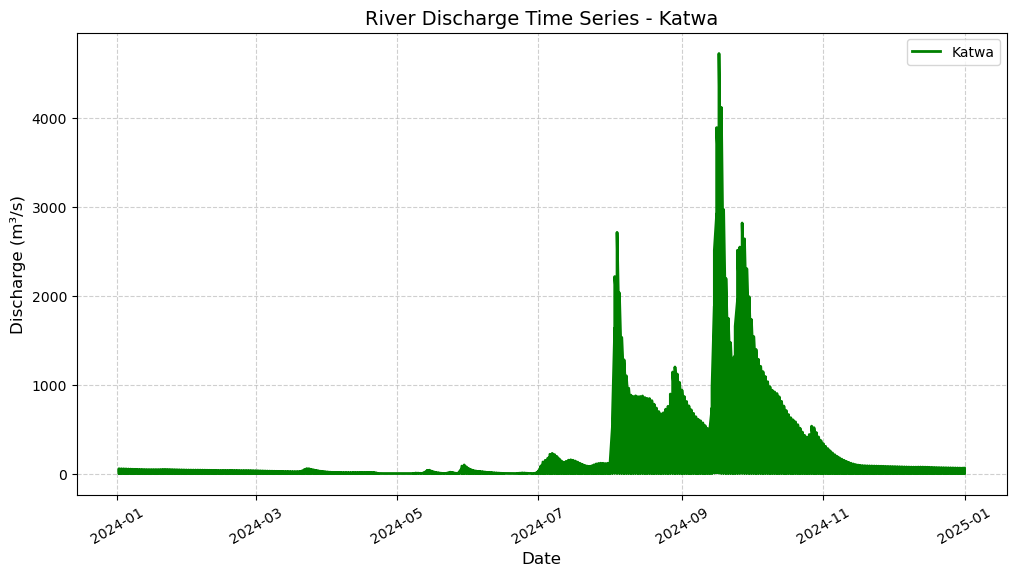

Graph saved at: H:\Major_Project\Work\Discharge Data\Graphs\kakdwip_discharge_2024.png


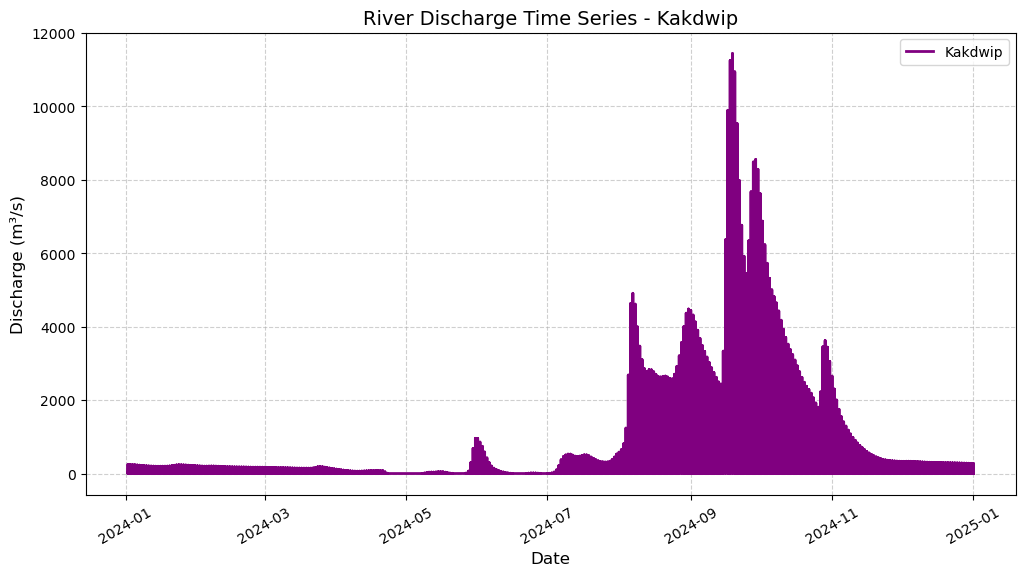

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths for the datasets
sahibganj_file = r"H:\Major_Project\Work\Discharge Data\Sahibganj\discharge_data_2024.csv"
farakka_file = r"H:\Major_Project\Work\Discharge Data\Farakka\discharge_data_2024.csv"
katwa_file = r"H:\Major_Project\Work\Discharge Data\Katwa\discharge_data_2024.csv"
kakdwip_file = r"H:\Major_Project\Work\Discharge Data\Kakdwip\discharge_data_2024.csv"

# Load the datasets
df_sahibganj = pd.read_csv(sahibganj_file)
df_farakka = pd.read_csv(farakka_file)
df_katwa = pd.read_csv(katwa_file)
df_kakdwip = pd.read_csv(kakdwip_file)

# Strip spaces from column names
for df in [df_sahibganj, df_farakka, df_katwa, df_kakdwip]:
    df.columns = df.columns.str.strip()

# Convert 'valid_time' to datetime
for df in [df_sahibganj, df_farakka, df_katwa, df_kakdwip]:
    if "valid_time" in df.columns:
        df["valid_time"] = pd.to_datetime(df["valid_time"])
    else:
        raise KeyError(f"'valid_time' column not found in one of the datasets.")

# Ensure 'dis24' column exists in each dataset before renaming
if "dis24" not in df_sahibganj.columns:
    raise KeyError("'dis24' column not found in Sahibganj dataset.")
if "dis24" not in df_farakka.columns:
    raise KeyError("'dis24' column not found in Farakka dataset.")
if "dis24" not in df_katwa.columns:
    raise KeyError("'dis24' column not found in Katwa dataset.")
if "dis24" not in df_kakdwip.columns:
    raise KeyError("'dis24' column not found in Kakdwip dataset.")

# Rename discharge columns
df_sahibganj = df_sahibganj.rename(columns={"dis24": "discharge_sahibganj"})
df_farakka = df_farakka.rename(columns={"dis24": "discharge_farakka"})
df_katwa = df_katwa.rename(columns={"dis24": "discharge_katwa"})
df_kakdwip = df_kakdwip.rename(columns={"dis24": "discharge_kakdwip"})

# Print maximum discharge values
max_sahibganj = df_sahibganj["discharge_sahibganj"].max(skipna=True)
max_farakka = df_farakka["discharge_farakka"].max(skipna=True)
max_katwa = df_katwa["discharge_katwa"].max(skipna=True)
max_kakdwip = df_kakdwip["discharge_kakdwip"].max(skipna=True)

print(f"Maximum Discharge at Sahibganj: {max_sahibganj:.2f} m³/s")
print(f"Maximum Discharge at Farakka: {max_farakka:.2f} m³/s")
print(f"Maximum Discharge at Katwa: {max_katwa:.2f} m³/s")
print(f"Maximum Discharge at Kakdwip: {max_kakdwip:.2f} m³/s")

# Create output directory if it does not exist
output_dir = r"H:\Major_Project\Work\Discharge Data\Graphs"
os.makedirs(output_dir, exist_ok=True)

# Function to plot and save individual graphs
def plot_discharge(df, location, color):
    plt.figure(figsize=(12, 6))
    plt.plot(df["valid_time"], df[f"discharge_{location.lower()}"], label=location, color=color, linewidth=2)
    
    # Formatting
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Discharge (m³/s)", fontsize=12)
    plt.title(f"River Discharge Time Series - {location}", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=30)

    # Save the figure
    output_path = os.path.join(output_dir, f"{location.lower()}_discharge_2024.png")
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    print(f"Graph saved at: {output_path}")

    # Show the plot
    plt.show()

# Plot and save separate graphs
plot_discharge(df_sahibganj, "Sahibganj", "blue")
plot_discharge(df_farakka, "Farakka", "red")
plot_discharge(df_katwa, "Katwa", "green")
plot_discharge(df_kakdwip, "Kakdwip", "purple")
